In [12]:
import geopandas as gpd
import pandas as pd
import numpy as np
import json
#import h3
import h3.api.basic_int as h3
import folium
import osmnx as ox
from shapely import wkt
from folium.plugins import HeatMap
from shapely.geometry import Polygon

In [34]:
import h3

import geopandas
import geodatasets
import contextily as cx
import matplotlib.pyplot as plt


def plot_df(df, column=None, ax=None):
    "Plot based on the `geometry` column of a GeoPandas dataframe"
    df = df.copy()
    df = df.to_crs(epsg=3857)  # web mercator

    if ax is None:
        _, ax = plt.subplots(figsize=(8,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    df.plot(
        ax=ax,
        alpha=0.5, edgecolor='k',
        column=column, categorical=True,
        legend=True, legend_kwds={'loc': 'upper left'},
    )
    cx.add_basemap(ax, crs=df.crs, source=cx.providers.CartoDB.Positron)


def plot_shape(shape, ax=None):
    df = geopandas.GeoDataFrame({'geometry': [shape]}, crs='EPSG:4326')
    plot_df(df, ax=ax)


def plot_cells(cells, ax=None):
    shape = h3.cells_to_h3shape(cells)
    plot_shape(shape, ax=ax)


def plot_shape_and_cells(shape, res=9):
    fig, axs = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
    plot_shape(shape, ax=axs[0])
    plot_cells(h3.h3shape_to_cells(shape, res), ax=axs[1])
    fig.tight_layout()

<LatLngPoly: [3]>


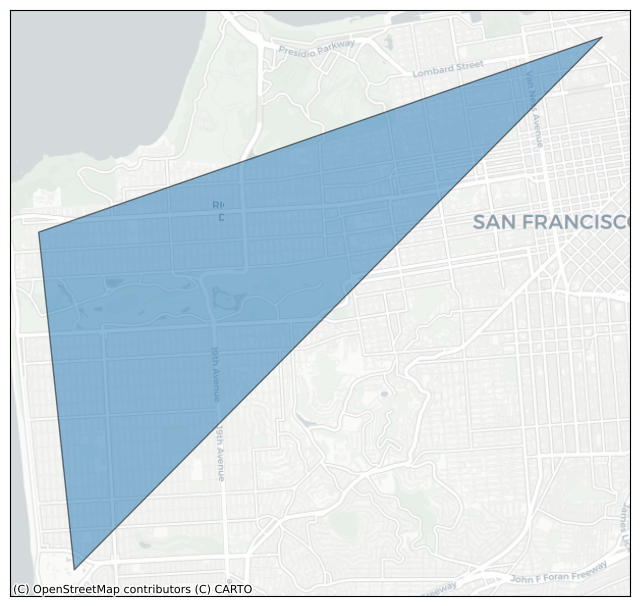

In [37]:
outer = [
    (37.804, -122.412),
    (37.778, -122.507),
    (37.733, -122.501)
]

poly = h3.LatLngPoly(outer)
print(poly)
plot_shape(poly)

<LatLngPoly: [3/(3,)]>


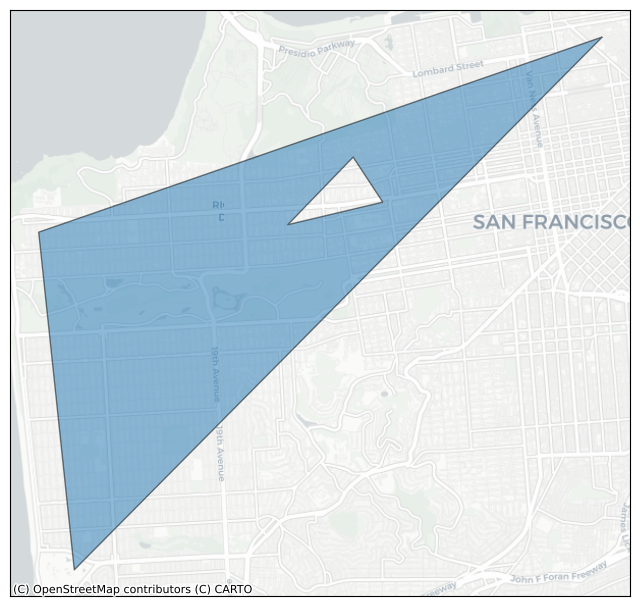

In [39]:
hole1 = [
    (37.782, -122.449),
    (37.779, -122.465),
    (37.788, -122.454),
]

poly = h3.LatLngPoly(outer, hole1)
print(poly)
plot_shape(poly)

<LatLngPoly: [3/(3, 4)]>


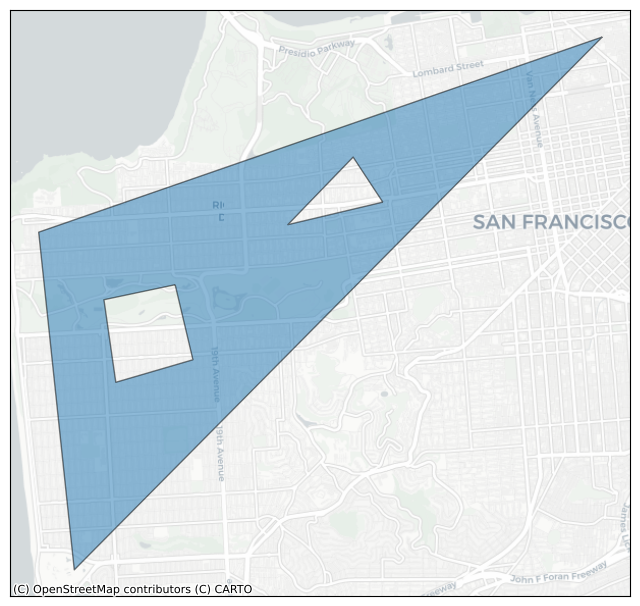

In [41]:
hole2 = [
    (37.771, -122.484),
    (37.761, -122.481),
    (37.758, -122.494),
    (37.769, -122.496),
]

poly = h3.LatLngPoly(outer, hole1, hole2)
print(poly)
plot_shape(poly)

In [43]:
h3.h3shape_to_cells(poly, res=7)

['872830958ffffff', '87283095bffffff', '87283095affffff', '872830829ffffff']

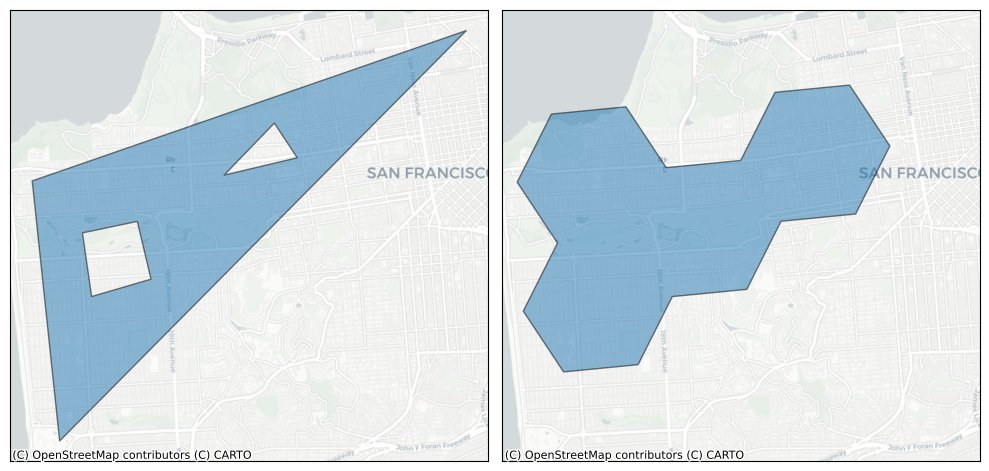

In [45]:
plot_shape_and_cells(poly, 7)

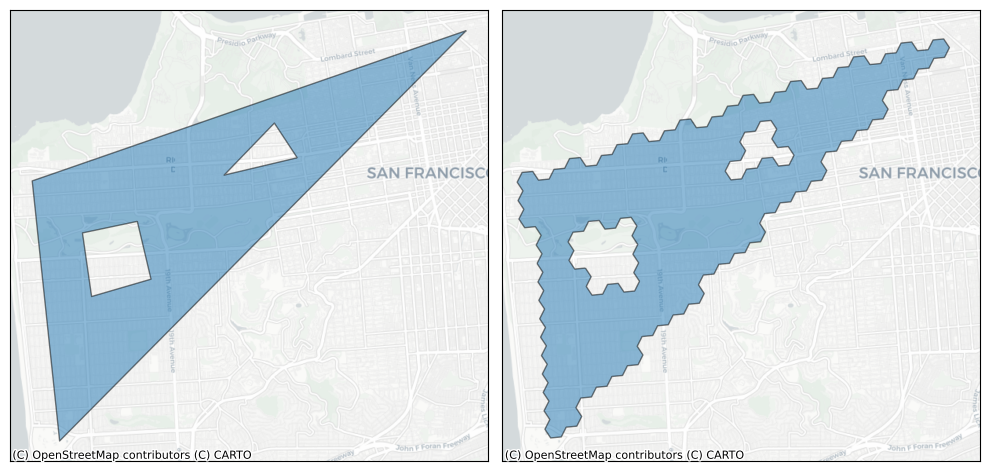

In [47]:
plot_shape_and_cells(poly, 9)

In [49]:
h = h3.latlng_to_cell(37.804, -122.412, res=9)
cells = h3.grid_ring(h, 2)
cells

['89283082b57ffff',
 '89283082b43ffff',
 '89283082b4bffff',
 '89283080cb3ffff',
 '89283080ca3ffff',
 '89283080ca7ffff',
 '89283080dd3ffff',
 '89283082b6fffff',
 '89283082b67ffff',
 '89283082b77ffff',
 '89283082b0fffff',
 '89283082b0bffff']

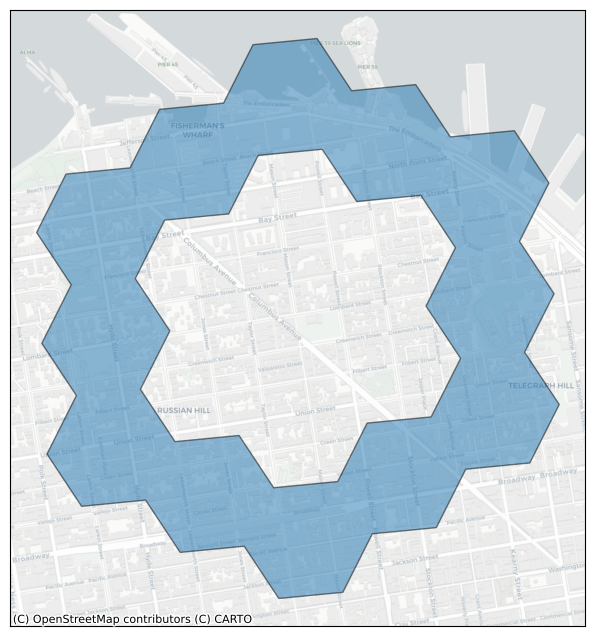

In [51]:
plot_cells(cells)

In [53]:
df = geopandas.read_file(geodatasets.get_path('nybb'))
df

Extracting 'nybb_16a/nybb.shp' from 'C:\Users\erkin\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\erkin\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from 'C:\Users\erkin\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\erkin\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from 'C:\Users\erkin\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\erkin\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from 'C:\Users\erkin\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\erkin\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'


,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


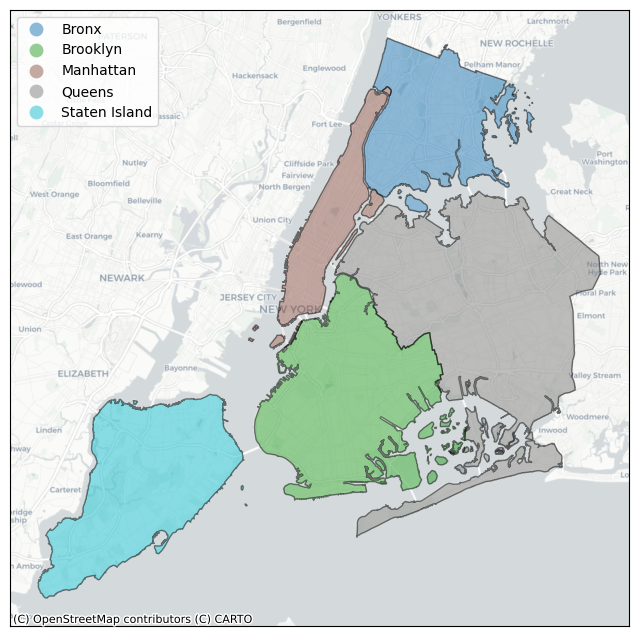

In [58]:
plot_df(df, column='BoroName')

In [68]:
df.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

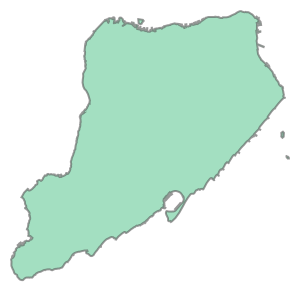

In [70]:
df.geometry[0]

In [72]:
df = df.to_crs(epsg=4326)
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [74]:
df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [76]:
geo = df.geometry[0]
type(geo)

shapely.geometry.multipolygon.MultiPolygon

In [78]:
h3.geo_to_cells(geo, res=6)

['862a1062fffffff', '862a10627ffffff', '862a1060fffffff', '862a10607ffffff']

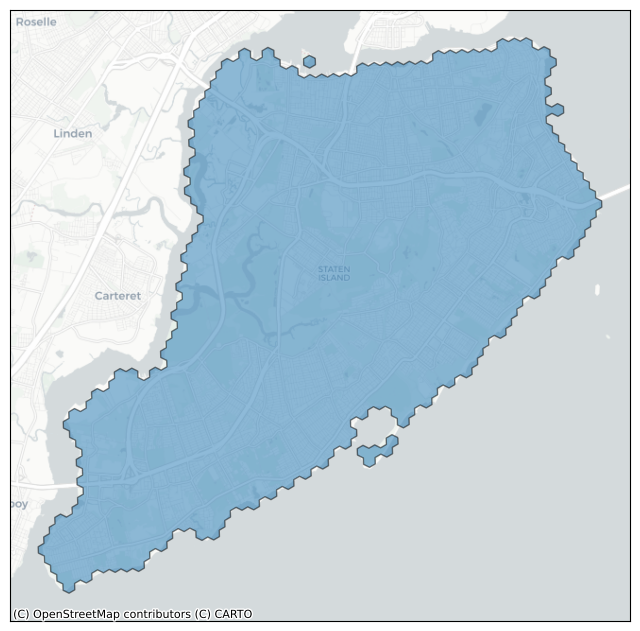

In [80]:
plot_cells(h3.geo_to_cells(geo, res=9))